In [9]:
!pip install matplotlib

  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
     ---------------------------------------- 0.0/162.8 kB ? eta -:--:--
     -- ------------------------------------- 10.2/162.8 kB ? eta -:--:--
     ---------------------- ---------------- 92.2/162.8 kB 1.3 MB/s eta 0:00:01
     -------------------------------------- 162.8/162.8 kB 1.4 MB/s eta 0:00:00
  Using cached kiwisolver-1.4.5-cp311-cp311-win_amd64.whl.metadata (6.5 kB)
   ---------------------------------------- 0.0/7.7 MB ? eta -:--:--
   - -------------------------------------- 0.2/7.7 MB 5.0 MB/s eta 0:00:02
   --- ------------------------------------ 0.6/7.7 MB 6.1 MB/s eta 0:00:02
   ----- ---------------------------------- 1.0/7.7 MB 6.8 MB/s eta 0:00:01
   ------- -------------------------------- 1.4/7.7 MB 7.6 MB/s eta 0:00:01
   ---------- ----------------------------- 2.0/7.7 MB 8.5 MB/s eta 0:00:01
   ------------- -------------------------- 2.6/7.7 MB 9.8 MB/s eta 0:00:01
   ----------------- -------

In [50]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

data = pd.read_excel("C:/Users/Usuario/Documents/Projectes/ChallengeAuditoria/challenge-auditoria/data/inventory_data_month.xlsx")

ts = ['Jan_2022', "Feb_2022", "Mar_2022", "Apr_2022", "May_2022", "Jun_2022", "Jul_2022", "Aug_2022", "Sep_2022", "Oct_2022", "Nov_2022", "Dec_2022", 'Jan_2023', "Feb_2023", "Mar_2023", "Apr_2023", "May_2023", "Jun_2023", "Jul_2023", "Aug_2023", "Sep_2023", "Oct_2023", "Nov_2023", "Dec_2023"]

data = data[ts]
# Assuming each row represents a time step and each column represents a month
# Transpose the data for better handling

data = data.transpose()

# Convert the data to numpy array
data_array = data.values.astype('float32')

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data_array)

data_scaled = data_array

# Prepare the data for LSTM
n_steps = 12  # Number of time steps to consider (you can adjust this based on your data)
X, y = [], []
for i in range(len(data_scaled)):
    end_ix = i + n_steps
    if end_ix > len(data_scaled) - 1:
        break
    seq_x, seq_y = data_scaled[i:end_ix, :], data_scaled[end_ix, :]
    X.append(seq_x)
    y.append(seq_y)

X, y = np.array(X), np.array(y)

# Define the LSTM model
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(X.shape[1], X.shape[2])))
model.add(Dense(y.shape[1]))  # Output layer

# Compile the model
model.compile(optimizer='adam', loss='mse')  # Mean Squared Error loss for regression problems

# Train the model
model.fit(X, y, epochs=100, verbose=1)

# You can now use this trained model for prediction.


Epoch 1/100


c:\Users\Usuario\Documents\Projectes\ChallengeAuditoria\challenge-auditoria\.venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 3324448000.0000
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step - loss: 3149541120.0000
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - loss: 2867454976.0000
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step - loss: 2550454016.0000
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 2405769216.0000
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 2244606720.0000
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 2101705216.0000
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 1975584256.0000
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 1987089536.0000
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 1920533504.0000
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step - loss: 1788100096.0000
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 1741595136.0000
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 1700480128.0000
Epoch 14/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms

In [46]:
print("Shape of data_scaled:", data_scaled.shape)
print("Shape of X (input data for LSTM):", X.shape)


Shape of data_scaled: (24, 383)
Shape of X (input data for LSTM): (12, 12, 383)


In [66]:
# Prepare input data for forecasting the next 12 months
last_12_months_data = data_scaled[-n_steps:, :].reshape((1, n_steps, len(data_scaled[0])))

# Make predictions for the next 12 months
forecast = []
for _ in range(12):
    # Predict the next month
    next_month_prediction = model.predict(last_12_months_data)
    
    # Append the prediction to the forecast list
    forecast.append(next_month_prediction[0])
    
    # Update input data for the next prediction
    last_12_months_data = np.roll(last_12_months_data, -1, axis=1)
    last_12_months_data[0, -1, :] = next_month_prediction[0]

# Inverse transform the forecasted data to get the actual values
forecast = scaler.inverse_transform(forecast)

# Print the forecasted values for the next 12 months
print("Forecasted values for the next 12 months:")
print(forecast)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Forecasted values for the next 12 months:
[[ 6.17176165e+08  7.42097373e+07 -1.67432257e+08 ...  3.85304644e+09
   6.76521397e+07  6.39198790e+09]
 [ 2.67612259e+08  1.65566983e+07  7.09104616e+07 ...  1.47132620e+09
   1.45072599e+07  3.80839807e+09]
 [ 1.01922039e+08 -1.97521363e+07 -1.19492295e+08 ...  1.57645706e+09
  -1.38865969e+07  8.59454079e+09]
 ...
 [ 1.74625331e+08 -1.53089054e+07  1.11362378e+08 ...  1.54066476e+09
  -2.50875399e+07  7.85153800e+08]
 [ 6.16545145e+07 -7.81354759e+06  2.26592677e+08 ...  4.73186006e+08
  -2.16

ValueError: x and y must have same first dimension, but have shapes (12,) and (1,)

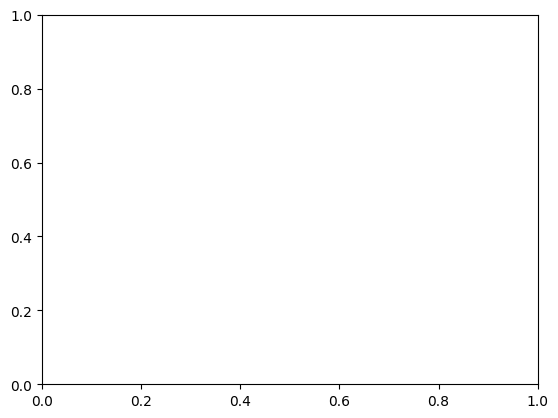

In [65]:
import matplotlib.pyplot as plt

# Assuming 'data' contains the original inventory data (before normalization)
# and 'forecast' contains the forecasted values



# Plot the forecasted values
for i in range(len(ts)):
    plt.plot(range(data_scaled.shape[0], data_scaled.shape[0] + 12), forecast[:, i])

print(len(forecast))
plt.title('Inventory Data')
plt.xlabel('Time Step')
plt.ylabel('Normalized Value')
plt.legend()
plt.show()
